# Mapa de Calor

Coleta de Dados dos cliques do Site

---

In [2]:
!pip install seaborn pandas matplotlib opencv-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -------------------------- ----------- 112.6/162.6 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 3.6 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 2.4 MB/s eta 0:00:05
    ---

In [7]:
df = pd.read_csv("clicks.csv")
df.sample(3)

,Timestamp,X Position,Y Position
2,2024-03-31T17:11:20.836Z,401,451
8,2024-03-31T17:11:54.141Z,1211,59
5,2024-03-31T17:11:34.564Z,0,264


C:\Users\Note HP\AppData\Local\Temp\ipykernel_7060\93845051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["X Position"] = df_filtrado["X Position"] * 0.93


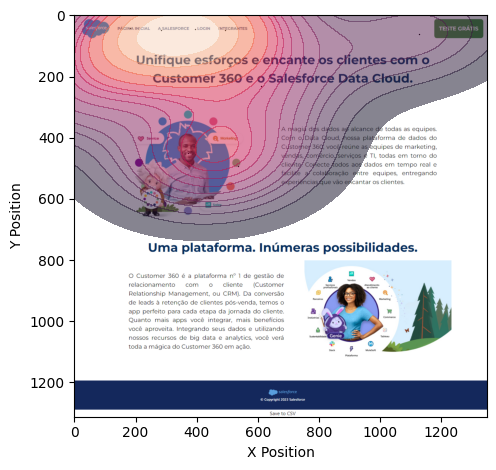

In [8]:
img = cv2.imread('site.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

df_filtrado = df[df["Y Position"] < img.shape[0]]

df_filtrado["X Position"] = df_filtrado["X Position"] * 0.93

sns.scatterplot(
    df_filtrado,
    x="X Position",
    y="Y Position",
    s=1, c="k"
)

sns.kdeplot(
    df_filtrado,
    x="X Position",
    y="Y Position",
    fill=True, cmap="rocket", alpha=0.5, levels=15
)

plt.xlim(0, img.shape[1])
plt.ylim(img.shape[0], 0)



plt.tight_layout()
plt.savefig("heatmap.png", dpi=1900)

In [9]:
img.shape

(1312, 1349, 3)

In [10]:
df_filtrado = df[df["Y Position"] < img.shape[0]]
df_filtrado

,Timestamp,X Position,Y Position
0,2024-03-31T17:11:08.475Z,197,42
1,2024-03-31T17:11:16.856Z,305,49
2,2024-03-31T17:11:20.836Z,401,451
3,2024-03-31T17:11:24.998Z,423,44
4,2024-03-31T17:11:28.277Z,576,493
5,2024-03-31T17:11:34.564Z,0,264
6,2024-03-31T17:11:39.323Z,657,232
7,2024-03-31T17:11:43.766Z,528,46
8,2024-03-31T17:11:54.141Z,1211,59
